In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
class_alt = pd.read_csv('/kaggle/input/eau-dataset/données/classe_alteration_seq_eau.csv')
list_faune = pd.read_csv('/kaggle/input/eau-dataset/données/liste_faunistique_floristique.csv')
physchim = pd.read_csv('/kaggle/input/eau-dataset/données/physicochimie.csv')
station = pd.read_csv('/kaggle/input/eau-dataset/données/station.csv')
taxon = pd.read_csv('/kaggle/input/eau-dataset/données/taxon.csv')
taxon_denom = pd.read_csv('/kaggle/input/eau-dataset/données/taxon_denombre.csv')

In [6]:
class_alt

,id,parametre_id,nom,alteration_id,nom.1,valeur,libelle,borne_inf_incluse,borne_sup_incluse,borne_inf,borne_sup,unite_mesure_code,libelle.1,norme
0,10231,1301,Température de l'Eau,0,TEMP,1,Bleu,t,f,\N,24,27,degré Celsius,DCE
1,10232,1301,Température de l'Eau,0,TEMP,2,Vert,t,f,24,25.5,27,degré Celsius,DCE
2,10233,1301,Température de l'Eau,0,TEMP,3,Jaune,t,f,25.5,27,27,degré Celsius,DCE
3,10234,1301,Température de l'Eau,0,TEMP,4,Orange,t,f,27,28,27,degré Celsius,DCE
4,10235,1301,Température de l'Eau,0,TEMP,5,Rouge,t,f,28,\N,27,degré Celsius,DCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,10659,1383,Zinc,16,MPMI,2,Vert,t,f,1.3999999999999999,14,133,microgramme par litre,SEQ
1097,10660,1383,Zinc,16,MPMI,3,Jaune,t,f,14,140,133,microgramme par litre,SEQ
1098,10661,1383,Zinc,16,MPMI,4,Orange,t,f,140,330,133,microgramme par litre,SEQ
1099,10662,1383,Zinc,16,MPMI,5,Rouge,t,f,330,\N,133,microgramme par litre,SEQ


In [7]:
list_faune

,id,date_year,date_prel,liste_faunistique_floristique,facies_substrat,facies_vitesse,facies_profondeur
0,398943,2010,2010-08-11 00:00:00.000,3541596,"Pierres, galets",Vitesse < 5 cm/s,NaN
1,398943,2013,2013-07-23 00:00:00.000,3545195,"Roches, dalles",Vitesse < 5 cm/s,NaN
2,398944,2007,2007-08-29 00:00:00.000,3525909,NaN,NaN,NaN
3,398944,2007,2007-08-29 00:00:00.000,3525910,NaN,NaN,NaN
4,398944,2009,2009-09-28 00:00:00.000,3527276,NaN,NaN,NaN
...,...,...,...,...,...,...,...
55687,421014,2013,2013-06-27 00:00:00.000,3627210,NaN,NaN,NaN
55688,421014,2010,2010-06-09 00:00:00.000,3637746,NaN,NaN,NaN
55689,421014,2012,2012-06-21 00:00:00.000,3655503,NaN,NaN,NaN
55690,421014,2010,2010-06-09 00:00:00.000,3664704,NaN,NaN,NaN


In [8]:
physchim

,stn_id,date_year,valeur,parameter,parameter_name,unite,unite_name
0,398944,2007,10.825000,1301,Température de l'Eau,27,degré Celsius
1,398944,2008,10.300000,1301,Température de l'Eau,27,degré Celsius
2,398944,2009,11.208333,1301,Température de l'Eau,27,degré Celsius
3,398944,2010,10.930000,1301,Température de l'Eau,27,degré Celsius
4,398944,2011,10.433333,1301,Température de l'Eau,27,degré Celsius
...,...,...,...,...,...,...,...
187437,421014,2008,11.250000,1375,Sodium,162,milligramme par litre
187438,421014,2009,21.150000,1375,Sodium,162,milligramme par litre
187439,421014,2010,5.950000,1375,Sodium,162,milligramme par litre
187440,421014,2011,6.550000,1375,Sodium,162,milligramme par litre


In [9]:
station

,id,date_year,nom_masse_eau,her,st_x,st_y
0,398943,2007,SAMBRE,20,751467.817242,7.004902e+06
1,398943,2008,SAMBRE,20,751467.817242,7.004902e+06
2,398943,2010,SAMBRE,20,751467.817242,7.004902e+06
3,398943,2013,SAMBRE,20,751467.817242,7.004902e+06
4,398944,2007,HELPE MAJEURE,22,784221.677267,7.002720e+06
...,...,...,...,...,...,...
12056,421014,2009,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06
12057,421014,2010,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06
12058,421014,2011,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06
12059,421014,2012,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06


In [10]:
taxon

,id,nom_latin,taxon_parent_id
0,327,Beraeidae,20545.0
1,212,Hydropsyche,211.0
2,1072,Dendrocoelum,1071.0
3,1064,Polycelis,1061.0
4,1044,Sphaerium,1042.0
...,...,...,...
3395,29918,Bromus,23597.0
3396,1234,Drepanocladus,1218.0
3397,1594,Nymphoides peltata,1593.0
3398,10211,Drepanocladus aduncus,1234.0


In [42]:
taxon_denom

,liste_ff_id,taxon_id,valeur,critere_taxon,critere_taxon_id
0,3551360,322,1.0,Nombre exact d'individus,1
1,3551268,837,8.0,Nombre exact d'individus,1
2,3663043,2080,60.0,Longueur Minimale totale exprimée en mm,2
3,3551258,906,120.0,Nombre exact d'individus,1
4,3671035,2012,1.0,Poids individuel exprimé en g,3
...,...,...,...,...,...
1569195,3666127,2088,14.0,Poids total de l'ensemble des individus appart...,5
1569196,3626819,69,2.0,Nombre exact d'individus,1
1569197,3626765,183,3.0,Nombre exact d'individus,1
1569198,3671544,2197,18.0,Poids individuel exprimé en g,3


In [180]:
stn_lf = station.merge(list_faune, left_on='id', right_on='id')
stn_taxon = stn_lf.merge(taxon_denom, left_on='liste_faunistique_floristique', right_on='liste_ff_id')
stn_taxon

,id,date_year_x,nom_masse_eau,her,st_x,st_y,date_year_y,date_prel,liste_faunistique_floristique,facies_substrat,facies_vitesse,facies_profondeur,liste_ff_id,taxon_id,valeur,critere_taxon,critere_taxon_id
0,398943,2007,SAMBRE,20,751467.817242,7.004902e+06,2010,2010-08-11 00:00:00.000,3541596,"Pierres, galets",Vitesse < 5 cm/s,NaN,3541596,7843,4.0,Nombre exact d'individus,1
1,398943,2007,SAMBRE,20,751467.817242,7.004902e+06,2010,2010-08-11 00:00:00.000,3541596,"Pierres, galets",Vitesse < 5 cm/s,NaN,3541596,7881,66.0,Nombre exact d'individus,1
2,398943,2007,SAMBRE,20,751467.817242,7.004902e+06,2010,2010-08-11 00:00:00.000,3541596,"Pierres, galets",Vitesse < 5 cm/s,NaN,3541596,9034,1.0,Nombre exact d'individus,1
3,398943,2007,SAMBRE,20,751467.817242,7.004902e+06,2010,2010-08-11 00:00:00.000,3541596,"Pierres, galets",Vitesse < 5 cm/s,NaN,3541596,8992,1.0,Nombre exact d'individus,1
4,398943,2007,SAMBRE,20,751467.817242,7.004902e+06,2010,2010-08-11 00:00:00.000,3541596,"Pierres, galets",Vitesse < 5 cm/s,NaN,3541596,8719,1.0,Nombre exact d'individus,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10864784,421014,2013,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06,2008,2008-05-30 00:00:00.000,3672844,NaN,NaN,NaN,3672844,2080,678.0,Poids total de l'ensemble des individus appart...,5
10864785,421014,2013,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06,2008,2008-05-30 00:00:00.000,3672844,NaN,NaN,NaN,3672844,2165,8.0,Nombre exact d'individus,1
10864786,421014,2013,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06,2008,2008-05-30 00:00:00.000,3672844,NaN,NaN,NaN,3672844,2080,63.0,Nombre exact d'individus,1
10864787,421014,2013,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06,2008,2008-05-30 00:00:00.000,3672844,NaN,NaN,NaN,3672844,2221,31.0,Poids total de l'ensemble des individus appart...,5


In [275]:
stn_taxon_taille = stn_taxon[(stn_taxon['critere_taxon_id'] == 1)]

In [283]:
stn_taxon_taille.groupby('taxon_id').count().sort_values('valeur', ascending=False)

,id,date_year_x,nom_masse_eau,her,st_x,st_y,date_year_y,date_prel,liste_faunistique_floristique,facies_substrat,facies_vitesse,facies_profondeur,liste_ff_id,valeur,critere_taxon,critere_taxon_id
taxon_id,,,,,,,,,,,,,,,,
807,231373,231373,231373,231373,231373,231373,231373,231373,231373,85283,83711,48472,231373,231373,231373,231373
933,203616,203616,203616,203616,203616,203616,203616,203616,203616,66458,65439,38771,203616,203616,203616,203616
364,180101,180101,180101,180101,180101,180101,180101,180101,180101,56258,54833,34515,180101,180101,180101,180101
212,150696,150696,150696,150696,150696,150696,150696,150696,150696,40065,39060,22590,150696,150696,150696,150696
906,149066,149066,149066,149066,149066,149066,149066,149066,149066,43309,42175,27522,149066,149066,149066,149066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19047,4,4,4,4,4,4,4,4,4,4,4,0,4,4,4,4
6645,4,4,4,4,4,4,4,4,4,4,4,0,4,4,4,4
9055,4,4,4,4,4,4,4,4,4,4,4,0,4,4,4,4


In [286]:
stnk = stn_taxon_taille.groupby('id').count().sort_values('valeur', ascending=False).head(5).index.tolist()

In [289]:
txk = stn_taxon_taille[stn_taxon_taille['id'].isin(stnk)].groupby('taxon_id').count().sort_values('valeur', ascending=False).head(5).index.tolist()

In [290]:
stn_taxon_red = stn_taxon_taille[stn_taxon_taille['id'].isin(stnk) & stn_taxon_taille['taxon_id'].isin(txk)]
stn_taxon_red

,id,date_year_x,nom_masse_eau,her,st_x,st_y,date_year_y,date_prel,liste_faunistique_floristique,facies_substrat,facies_vitesse,facies_profondeur,liste_ff_id,taxon_id,valeur,critere_taxon,critere_taxon_id
5344023,404039,2007,LE TRIEUX ET SES AFFLUENTS DEPUIS KERPERT JUSQ...,12,249649.90625,6833110.0,2007,2007-08-28 00:00:00.000,3575702,NaN,NaN,NaN,3575702,618,58.0,Nombre exact d'individus,1
5344029,404039,2007,LE TRIEUX ET SES AFFLUENTS DEPUIS KERPERT JUSQ...,12,249649.90625,6833110.0,2007,2007-08-28 00:00:00.000,3575702,NaN,NaN,NaN,3575702,807,19.0,Nombre exact d'individus,1
5344034,404039,2007,LE TRIEUX ET SES AFFLUENTS DEPUIS KERPERT JUSQ...,12,249649.90625,6833110.0,2007,2007-08-28 00:00:00.000,3575702,NaN,NaN,NaN,3575702,364,5.0,Nombre exact d'individus,1
5344038,404039,2008,LE TRIEUX ET SES AFFLUENTS DEPUIS KERPERT JUSQ...,12,249649.90625,6833110.0,2007,2007-08-28 00:00:00.000,3575702,NaN,NaN,NaN,3575702,618,58.0,Nombre exact d'individus,1
5344044,404039,2008,LE TRIEUX ET SES AFFLUENTS DEPUIS KERPERT JUSQ...,12,249649.90625,6833110.0,2007,2007-08-28 00:00:00.000,3575702,NaN,NaN,NaN,3575702,807,19.0,Nombre exact d'individus,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5849412,404930,2013,LA SARRE ET SES AFFLUENTS DEPUIS L'ETANG-DU-RO...,12,243435.50000,6785237.0,2012,2012-08-21 00:00:00.000,3628896,Blocs,25 cm/s <= vitesse < 75 cm/s,Inconnu,3628896,69,60.0,Nombre exact d'individus,1
5849420,404930,2013,LA SARRE ET SES AFFLUENTS DEPUIS L'ETANG-DU-RO...,12,243435.50000,6785237.0,2012,2012-08-21 00:00:00.000,3628896,Blocs,25 cm/s <= vitesse < 75 cm/s,Inconnu,3628896,364,93.0,Nombre exact d'individus,1
5849424,404930,2013,LA SARRE ET SES AFFLUENTS DEPUIS L'ETANG-DU-RO...,12,243435.50000,6785237.0,2012,2012-08-21 00:00:00.000,3628896,Blocs,25 cm/s <= vitesse < 75 cm/s,Inconnu,3628896,622,5.0,Nombre exact d'individus,1
5849435,404930,2013,LA SARRE ET SES AFFLUENTS DEPUIS L'ETANG-DU-RO...,12,243435.50000,6785237.0,2012,2012-08-21 00:00:00.000,3628896,Blocs,25 cm/s <= vitesse < 75 cm/s,Inconnu,3628896,618,36.0,Nombre exact d'individus,1


In [293]:
stn_taxon_taille[(stn_taxon_taille['taxon_id'] == 807) & (stn_taxon_taille['id'].isin(stnk))]

,id,date_year_x,nom_masse_eau,her,st_x,st_y,date_year_y,date_prel,liste_faunistique_floristique,facies_substrat,facies_vitesse,facies_profondeur,liste_ff_id,taxon_id,valeur,critere_taxon,critere_taxon_id
5344029,404039,2007,LE TRIEUX ET SES AFFLUENTS DEPUIS KERPERT JUSQ...,12,249649.90625,6833110.0,2007,2007-08-28 00:00:00.000,3575702,NaN,NaN,NaN,3575702,807,19.0,Nombre exact d'individus,1
5344044,404039,2008,LE TRIEUX ET SES AFFLUENTS DEPUIS KERPERT JUSQ...,12,249649.90625,6833110.0,2007,2007-08-28 00:00:00.000,3575702,NaN,NaN,NaN,3575702,807,19.0,Nombre exact d'individus,1
5344059,404039,2009,LE TRIEUX ET SES AFFLUENTS DEPUIS KERPERT JUSQ...,12,249649.90625,6833110.0,2007,2007-08-28 00:00:00.000,3575702,NaN,NaN,NaN,3575702,807,19.0,Nombre exact d'individus,1
5344074,404039,2010,LE TRIEUX ET SES AFFLUENTS DEPUIS KERPERT JUSQ...,12,249649.90625,6833110.0,2007,2007-08-28 00:00:00.000,3575702,NaN,NaN,NaN,3575702,807,19.0,Nombre exact d'individus,1
5344089,404039,2011,LE TRIEUX ET SES AFFLUENTS DEPUIS KERPERT JUSQ...,12,249649.90625,6833110.0,2007,2007-08-28 00:00:00.000,3575702,NaN,NaN,NaN,3575702,807,19.0,Nombre exact d'individus,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5849329,404930,2009,LA SARRE ET SES AFFLUENTS DEPUIS L'ETANG-DU-RO...,12,243435.50000,6785237.0,2012,2012-08-21 00:00:00.000,3628896,Blocs,25 cm/s <= vitesse < 75 cm/s,Inconnu,3628896,807,24.0,Nombre exact d'individus,1
5849356,404930,2010,LA SARRE ET SES AFFLUENTS DEPUIS L'ETANG-DU-RO...,12,243435.50000,6785237.0,2012,2012-08-21 00:00:00.000,3628896,Blocs,25 cm/s <= vitesse < 75 cm/s,Inconnu,3628896,807,24.0,Nombre exact d'individus,1
5849383,404930,2011,LA SARRE ET SES AFFLUENTS DEPUIS L'ETANG-DU-RO...,12,243435.50000,6785237.0,2012,2012-08-21 00:00:00.000,3628896,Blocs,25 cm/s <= vitesse < 75 cm/s,Inconnu,3628896,807,24.0,Nombre exact d'individus,1
5849410,404930,2012,LA SARRE ET SES AFFLUENTS DEPUIS L'ETANG-DU-RO...,12,243435.50000,6785237.0,2012,2012-08-21 00:00:00.000,3628896,Blocs,25 cm/s <= vitesse < 75 cm/s,Inconnu,3628896,807,24.0,Nombre exact d'individus,1


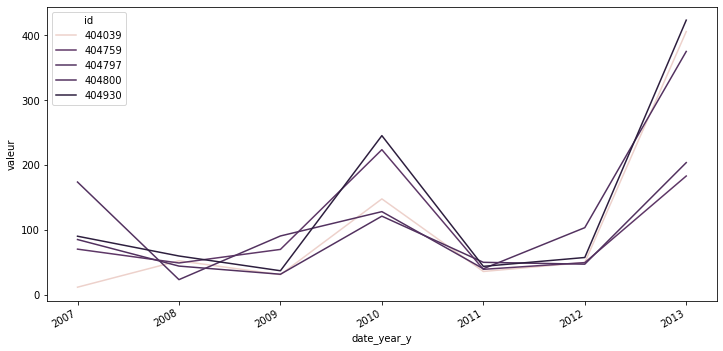

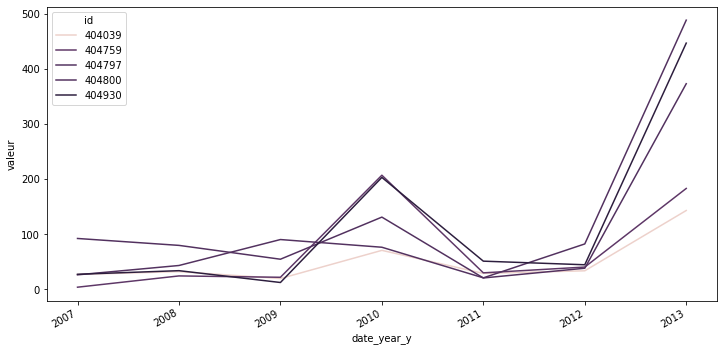

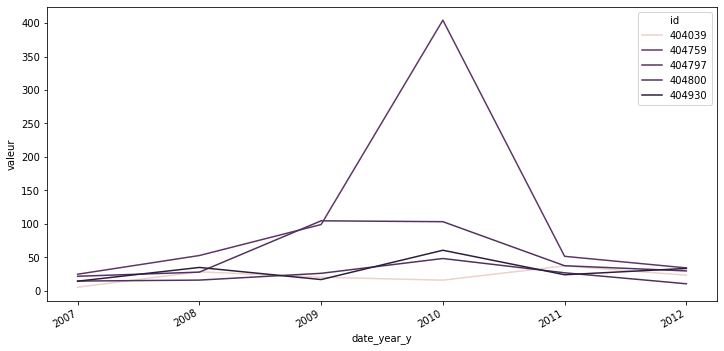

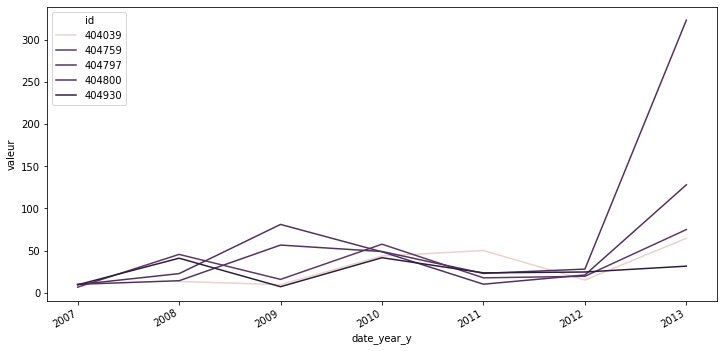

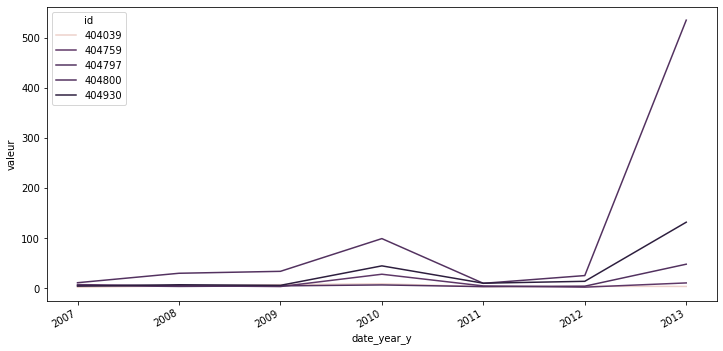

In [295]:
for t in txk:
    fig, ax = plt.subplots(figsize = (12,6))
    sns.lineplot(data=stn_taxon_taille[(stn_taxon_taille['taxon_id'] == t) & (stn_taxon_taille['id'].isin(stnk))], x="date_year_y", y="valeur", hue="id", ci=None, ax=ax)
    fig.autofmt_xdate()
    plt.show()